# Introduction

At this stage of the course we've only been exposed to the very basics of training CNN models using fastai. Specifically, we've seen the following code cell from Lesson 1 of course.fast.ai:

```python
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
```

> <span style="color:green"> We'll basically use only the methods and techniques shown in that code snippet. Later in the course you'll learn _much_ more about the topic, and will have way more control over the model construction and model training process.</span>

# Setup

In [1]:
# To avoid a code-completion issue on certain versions of Jupyter
%config Completer.use_jedi = False 

In [2]:
# This is a quick check of whether the notebook is currently running on 
# Google Colaboratory, as that makes some difference for the code below.

if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


In [3]:
if colab:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *

In [4]:
# There's a bug in the plot_top_losses function in the current 
# release of fastai (v. 2.5.3). We'll install the dev version here 
# to bypass the problem
import sys
!{sys.executable} -m pip install --upgrade git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-4xi60px0
  Running command git clone --filter=blob:none -q https://github.com/fastai/fastai.git /tmp/pip-req-build-4xi60px0
  Resolved https://github.com/fastai/fastai.git to commit 351f4b9314e2ea23684fb2e19235ee5c5ef8cbfd
  Preparing metadata (setup.py) ... done


In [5]:
%matplotlib inline
from fastai.vision.all import *

In [6]:
if colab:
    DATA = Path('/content/gdrive/MyDrive/DAT255/fruits-360')
if not colab:
    # Set this to where you downloaded the image data
    DATA = Path('/home/alex/data-tmp/fruits-360')

In [7]:
NB_DIR = Path.cwd()
MODELS = NB_DIR/'..'/'models'

# Create a data loader

In [8]:
path = DATA/'fruits-360_dataset'/'fruits-360'

In [9]:
path.ls()

(#7) [Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/LICENSE'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/models'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/Test'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/papers'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/test-multiple_fruits'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/readme.md'),Path('/home/alex/data-tmp/fruits-360/fruits-360_dataset/fruits-360/Training')]

In [10]:
dls = ImageDataLoaders.from_folder(path, train='Training', valid='Test', item_tfms=Resize(100))

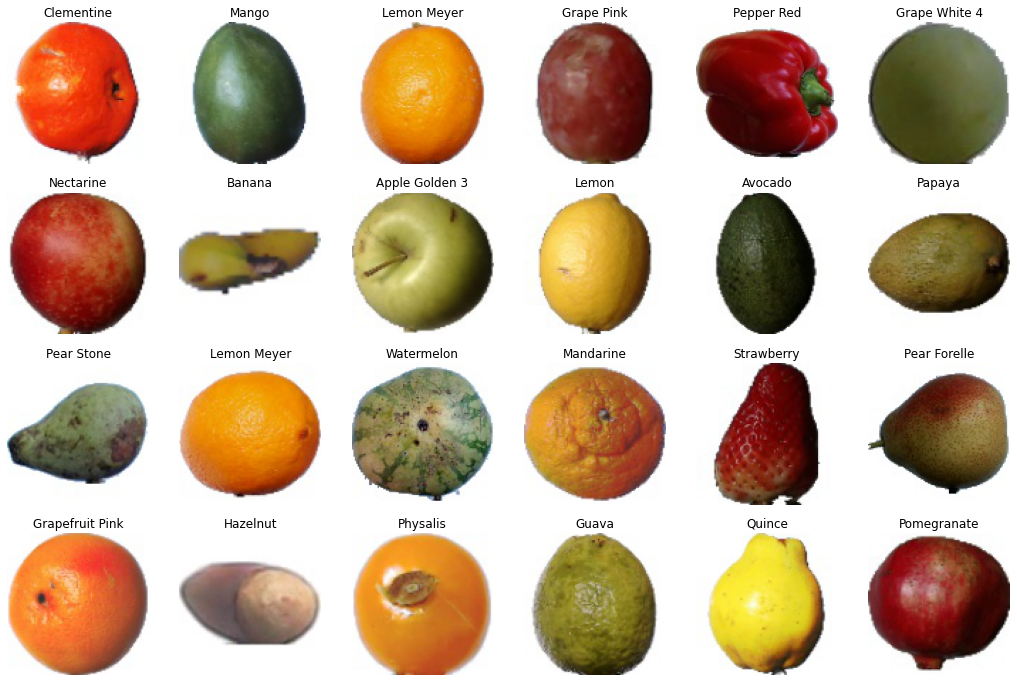

In [11]:
dls.show_batch(max_n=24)

# Train a model

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.054871,0.111491,0.031426,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.002675,0.025937,0.008022,00:39


# Evaluating the model

> <span style="color:green"> Strictly speaking, this section will draw on _some_ (but not many!) methods covered slightly later in the course.</span>

We'd like to do a quick check of our model's performance, beyond the error rate printed out during the above training process. 

Here are some random images, labels and predictions: 

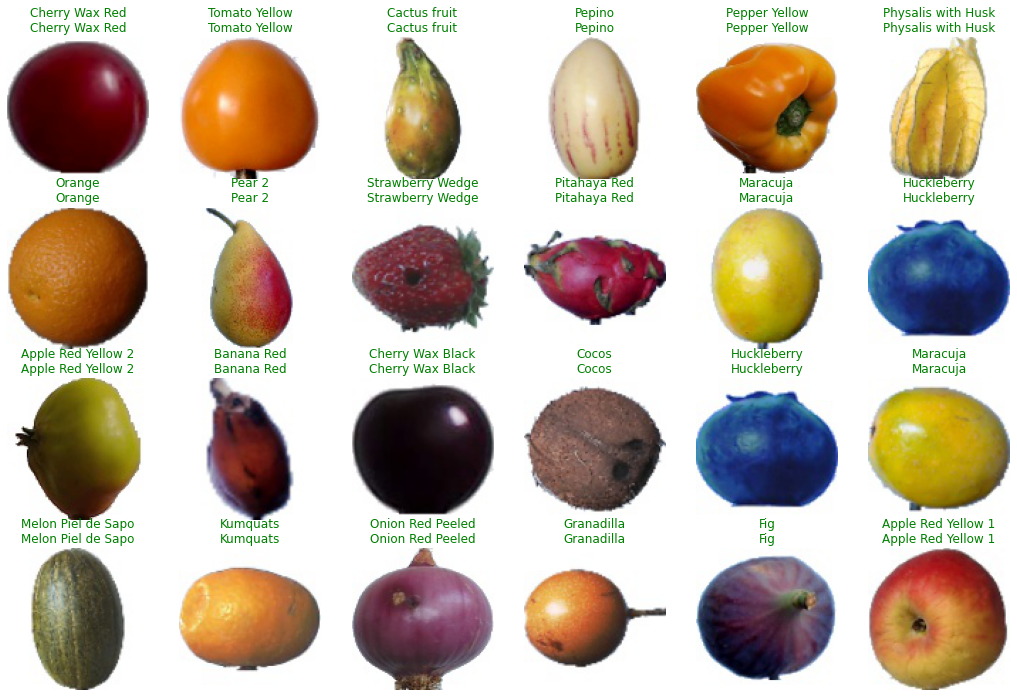

In [23]:
learn.show_results(max_n=24)

How many of the test images did we misclassify? What kinds of mistakes were made? 

We can use a confusion matrix to answer this:

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

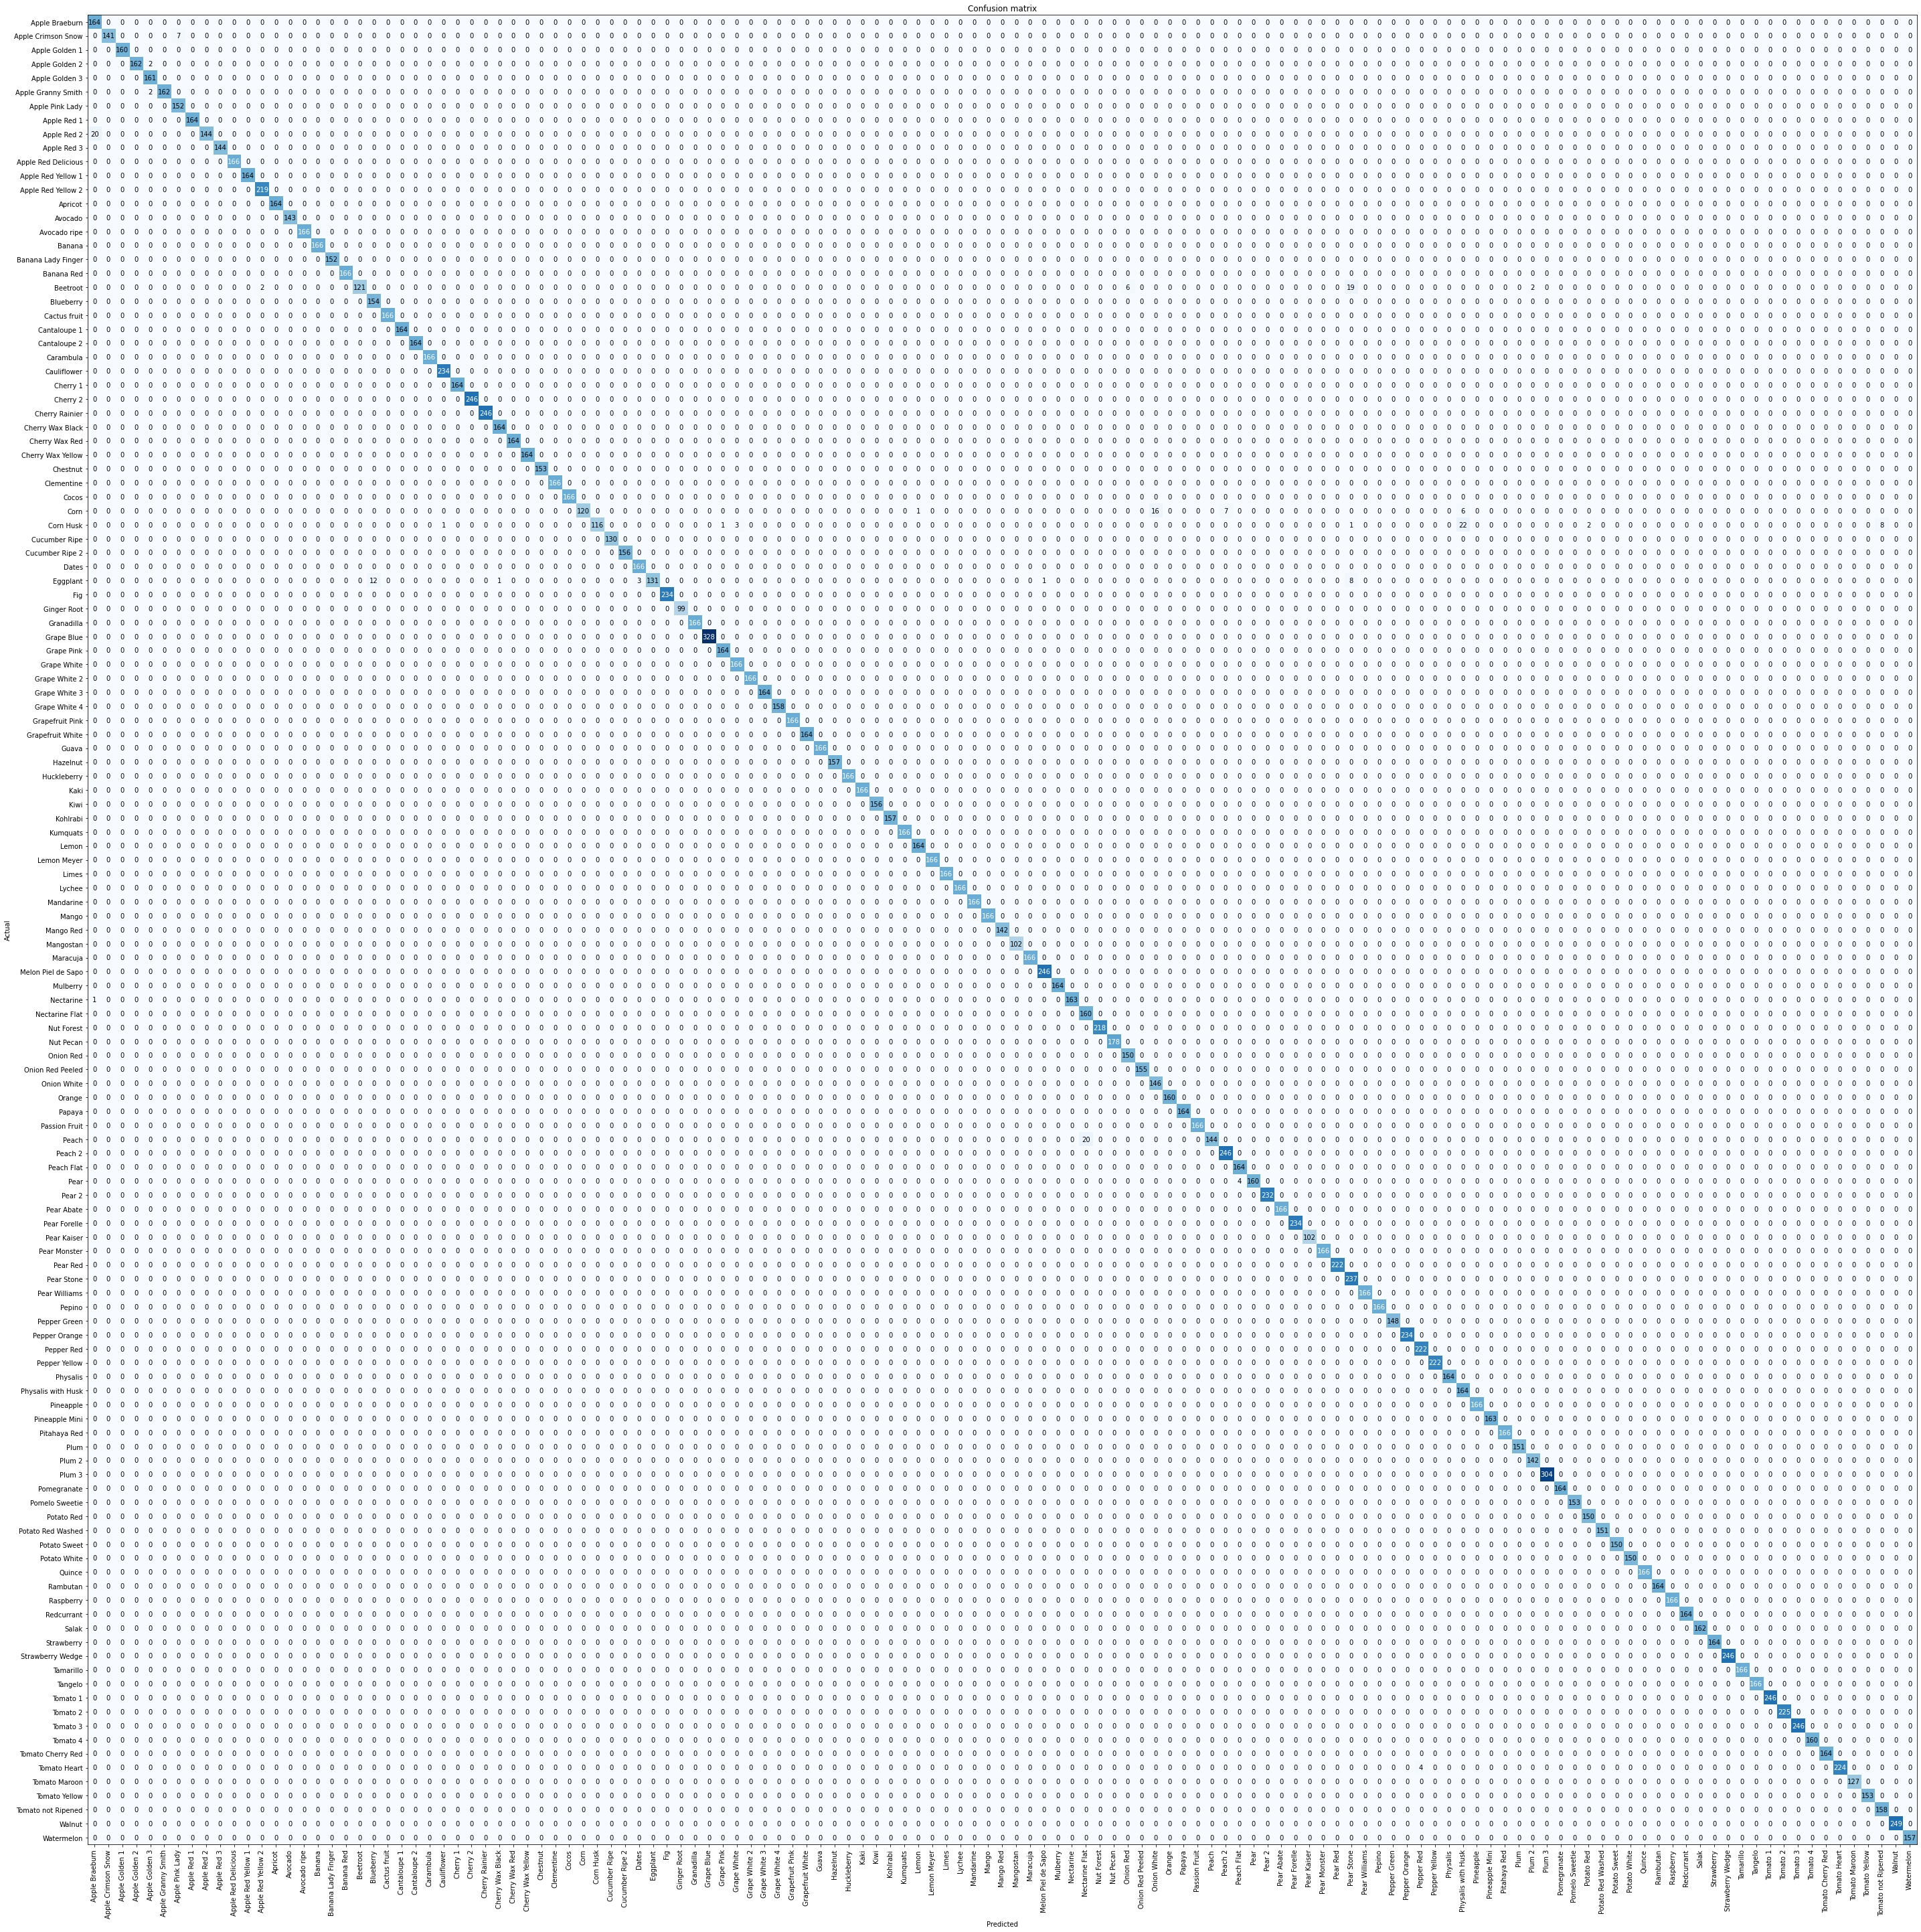

In [15]:
interp.plot_confusion_matrix(figsize=(40,40))

What images did the model struggle the most with? More precisely, what were the most confident and wrong predictions?

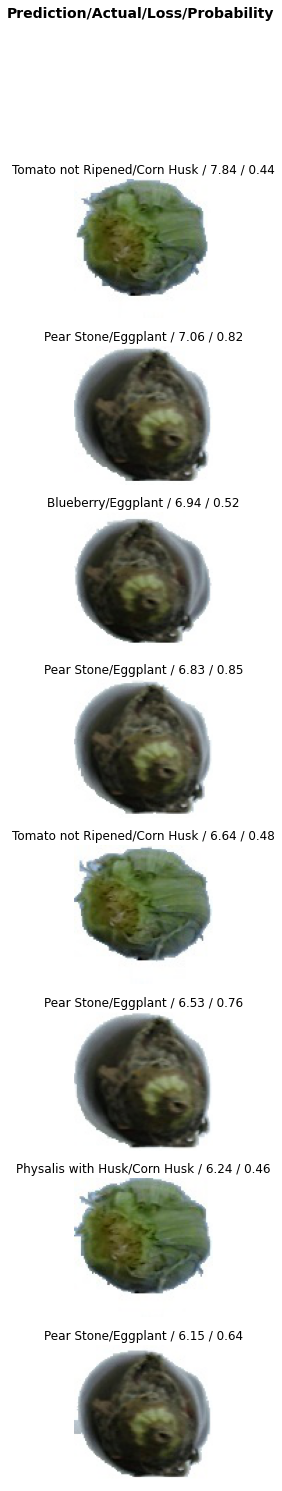

In [24]:
interp.plot_top_losses(k=8, nrows=8)

# Save pipeline (data loader incl. transformations + model)

In [25]:
learn.export(MODELS/'fruit_model_v1')

# Next: deploy the model